In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def sigmoid(x):
    return  1.0 / (1.0 + np.exp(-x))

In [3]:
x1_label1 = np.random.normal(-3,1,1000)
x2_label1 = np.random.normal(2,1,1000)
x1_label2 = np.random.normal(7,1,1000)
x2_label2 = np.random.normal(6,1,1000)

x1s = np.append(x1_label1,x1_label2)
x2s = np.append(x2_label1,x2_label2)
ys = np.asarray([0.0] * len(x1_label1) + [1.0] * len(x1_label2))

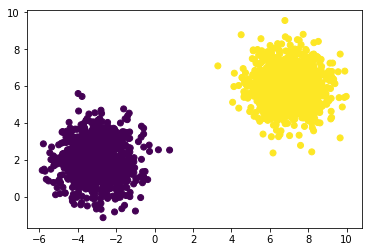

In [4]:
plt.scatter(x1s,x2s,c=ys)

In [5]:
learning_rate = 0.1
training_epoch = 2000

In [48]:
X1 = tf.placeholder(tf.float32, shape=(None,), name="x1")
X2 = tf.placeholder(tf.float32, shape=(None,), name="x2")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0.0,0.0,0.0], name="w", trainable=True)

def model(X1,X2,w):
    return tf.sigmoid(tf.add(tf.add(tf.multiply(X1,w[1]),tf.multiply(X2,w[2])),w[0]))
y_model = model(X1,X2,w)

cost = tf.reduce_mean(-tf.log(y_model * Y + (1.0 - y_model) * (1.0 - Y)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epoch):
        err,_ = sess.run([cost,train_op], feed_dict={X1:x1s,X2:x2s,Y:ys})
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w,feed_dict={X1:x1s,X2:x2s,Y:ys})
print(w_val)

[-0.2770613  1.2465719 -0.2593174]


In [64]:
from matplotlib import cm

[[1.12742553e-11 1.45029857e-11 1.86563626e-11 ... 3.14163281e-01
  3.70774877e-01 4.31174381e-01]
 [1.45029857e-11 1.86563626e-11 2.39991870e-11 ... 3.70774877e-01
  4.31174381e-01 4.93693183e-01]
 [1.86563626e-11 2.39991870e-11 3.08720937e-11 ... 4.31174381e-01
  4.93693183e-01 5.56409847e-01]
 ...
 [3.14163281e-01 3.70774877e-01 4.31174381e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [3.70774877e-01 4.31174381e-01 4.93693183e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [4.31174381e-01 4.93693183e-01 5.56409847e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


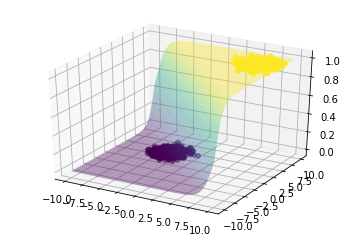

In [68]:
xses, yses = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))

with tf.Session() as sess:
            zses = sess.run(tf.sigmoid(xses * w_val[1] + yses * w_val[1] + w_val[0]))
print(zses)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(xses,yses,zses, alpha=0.4,cmap=cm.viridis)
ax.scatter(x1s,x2s,ys,c=ys)
plt.show()